# Project: Investigate No-Show Appointment Dataset 

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> 30% of patients miss their appointments (no-show) and analysing this dataset would help in predicting why this is so. From the dataset, the dependent variable is 'No-show' and the independent variables are PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,
Handcap, and SMS_received


DESCRIPTION OF COLUMNS (source Kaggle https://www.kaggle.com/joniarroba/noshowappointments)
>1. PatientId : Identification of a patient
2. AppointmentID: Identification of each appointment
3. Gender: Male or Female 
4. ScheduledDay:The day of the actual appointment, when they have to visit the doctor
5. AppointmentDay:The day someone called or registered the appointment, this is before appointment of course.
6. Age: How old is the patient
7. Neighbourhood:Where the appointment takes place.
8. Scholarship:True of False
9. Hypertension:True of False
10. Diabetes:True of False
11. Alcoholism:True of False
12. Handcap: True of False
13. SMS_received:1 or more messages sent to the patient.
14. No-show:True or False


### Research Questions
>1. Does the Amount of time between Appointment and Scheduled days influence no-show at doctor's appointment?
2. Does the health and habit of the patient (if diabetic, hypentensive, or an alcoholic) influence no-show at doctor's appointments?
3. Gender and age affect no-show at doctor's appointments?

In [90]:
#Importing the packages to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

sns.set_style('darkgrid')



<a id='wrangling'></a>
## Data Wrangling

> Loading the data, assessing it and cleaning. 

>In the succeeding cells, i'll load in the dataset, check for cleanliness, and prepare it for further analysis. 

### Steps taken during cleaning and justify cleaning decisions.
>1.  Created a timestamp datatype for Appointment and Scheduled days since they are indicating datetimes
2. Found the difference between  Appointment and Scheduled days and created a new column
3. Renamed the colums to all small letters and using underscores where necessary
4. Checked for duplicated rows to drop but found none
5. There were no null values 

In [91]:
# Load your data and printing out a few lines.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [92]:
#inspecting the dataset
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

In [93]:
#checking for duplicated rows
df.duplicated().sum()

0

In [94]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [95]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Cleaning the Dataset

The dataset has 110527 rows and 14 columns. 

df.info() indicates it contains no missing values.
Further analysis as shown, indicates it has no duplicated rows and null values.

### Up Next,
>1. The columns will be renamed for conveniency
>2. The PatientID,AppointmentID,and Neighbourhood columns will be dropped as they do not directly impact my analysis of this data
>3. The timestamp datatype for Appointment and Scheduled days was created since they are indicating datetimes
4. The Appointment and Scheduled days were dropped and a new column showing their difference was created 


In [96]:
#rename columns and printing out a few lines.
new_labels = list(df.columns)
new_labels = ['patient_id','appointment_id','gender','scheduled_day','appointment_day','age','neighbourhood','scholarship',
             'hypertension','diabetes','alcoholism','handicap','sms_received','no_show']
df.columns = new_labels
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [97]:
# Creating a timestamp datatype for Appointment and Scheduled days 
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['appointment_day'].dtypes

datetime64[ns, UTC]

#### finding differences in datetime
https://stackoverflow.com/questions/22923775/calculate-pandas-dataframe-time-difference-between-two-columns-in-hours-and-minu

In [98]:
df['day_difference'] = (df['appointment_day']-df['scheduled_day']).astype('timedelta64[D]')
  
df['day_difference']=(df['day_difference']).astype(int) 
df['day_difference']

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Name: day_difference, Length: 110527, dtype: int32

In [99]:
df.drop(['patient_id','appointment_id','neighbourhood','scheduled_day','appointment_day'], axis = 1, inplace =True)
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_difference
0,F,62,0,1,0,0,0,0,No,-1
1,M,56,0,0,0,0,0,0,No,-1
2,F,62,0,0,0,0,0,0,No,-1
3,F,8,0,0,0,0,0,0,No,-1
4,F,56,0,1,1,0,0,0,No,-1


<a id='eda'></a>
## Exploratory Data Analysis

>  Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Does the Amount of time between Appointment and Scheduled days influence no-show at doctor's appointment?
> The dataset is divided into two dataframes:  'showed_up' and 'absent'

Grouping the each sub-dataset by 'no_show' and 'day_difference' and analysing the statistical data is done with aid of visualizations.

The 'day_difference' is a converted to a categorical feature using Pandas.cut


In [100]:
#dividing the dataset into those that showed up
showed_up = df.query('no_show == "No"')
showed_up.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_difference
0,F,62,0,1,0,0,0,0,No,-1
1,M,56,0,0,0,0,0,0,No,-1
2,F,62,0,0,0,0,0,0,No,-1
3,F,8,0,0,0,0,0,0,No,-1
4,F,56,0,1,1,0,0,0,No,-1


In [101]:
#dividing the dataset into those that were no-show
absent = df.query('no_show == "Yes"')
absent.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_difference
6,F,23,0,0,0,0,0,0,Yes,1
7,F,39,0,0,0,0,0,0,Yes,1
11,M,29,0,0,0,0,0,1,Yes,2
17,F,40,1,0,0,0,0,0,Yes,0
20,F,30,0,0,0,0,0,0,Yes,1


In [102]:
#ensuring that these queries included only one in each samples
num_samples = df.shape[0]
num_samples == showed_up['no_show'].count() + absent['no_show'].count()

True

In [103]:
showed_up.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,day_difference
count,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,7.754659
std,23.338878,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380,14.550398
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


From the information, querying the data set into those that showed up,  the following observations were made

1. Age: from the mean age, 50%,75% and the max, it can be assumed that older people showed up more for their doctor's appointment.

2. Hypertension: the statistical data might indicate that those that showed up for the doctor's appointment are not hypertensive

3. Diabetes:the statistical data might indicate that those that showed up for the doctor's appointment are not diabetic

4. Alcoholism: the statistical data might indicate that those that showed up for the doctor's appointment are not alcoholics

5. Sms_received: the statistical data might indicate that receiving the sms might not be the main factor that made these patients  show up for the doctor's appointment 

### Day Interval Implication
1. Low = lowest 25% of day_difference to  50% of day_difference
2. Medium = 50% of day_difference - 75% day_difference 
3. High = 75% - max day_difference

In [109]:
showed_up['day_difference'].describe()


count    88208.000000
mean         7.754659
std         14.550398
min         -1.000000
25%         -1.000000
50%          1.000000
75%         11.000000
max        178.000000
Name: day_difference, dtype: float64

In [105]:
absent['day_difference'].describe()

count    22319.000000
mean        14.831489
std         16.605912
min         -7.000000
25%          3.000000
50%         10.000000
75%         22.000000
max        178.000000
Name: day_difference, dtype: float64

In [115]:
#The 'day_difference' is a converted to a categorical feature using Pandas.cut
bin_edges1 = [-1.0,1.0,11.0,178.0]
bin_names = ['low','medium','high']
showed_up['day_difference']= pd.cut(showed_up['day_difference'],bin_edges1,labels =bin_names)
showed_up['day_difference']

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
bin_edges2 = [3.0,10.0,22.0,178.0]
absent['day_difference']= pd.cut(absent['day_difference'],bin_edges2,labels =bin_names,retbin=True,duplicates = 'drop')
absent['day_difference']

In [44]:
#dividing the dataset into those that were no-show
no_show = df.query('no_show == "Yes"')
no_show.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [51]:
#ensuring that these queries included only one in each samples
num_samples = df.shape[0]
num_samples == showed_up['no_show'].count() + no_show['no_show'].count()

True

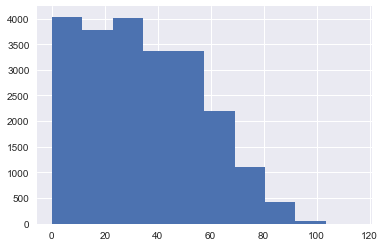

In [49]:
no_show['age'].hist()

In [45]:
no_show

,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,Yes
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,0,0,0,0,0,1,Yes
17,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,1,0,0,0,0,0,Yes
20,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
110484,F,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45,0,0,0,0,0,0,Yes
110492,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,0,1,0,0,0,0,Yes
110496,F,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37,0,1,0,0,0,0,Yes
110515,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,0,1,0,0,0,0,Yes


# Exploring Age and No-show

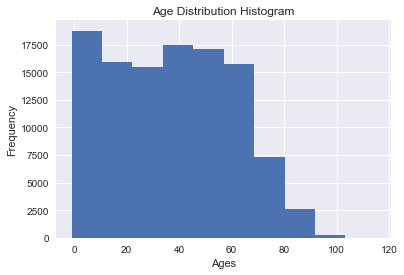

In [9]:
df['Age'].plot(kind='hist');
plt.title('Age Distribution Histogram')
plt.xlabel('Ages')

### Research Question 2  (Replace this header name!)

In [50]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


# Comparing with No-show

In [60]:
show_up = df.No-show == 'No'
show_up.head()

AttributeError: 'DataFrame' object has no attribute 'No'

In [54]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [12]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [58]:
df['Age']

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110527, dtype: int64

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!